<h1> Recommender Systems </h1>

 Personalizing products to customers has become a common task for data scientists across industries. To recommend products we use recommender systems. Types of them are shown in graph below.
 
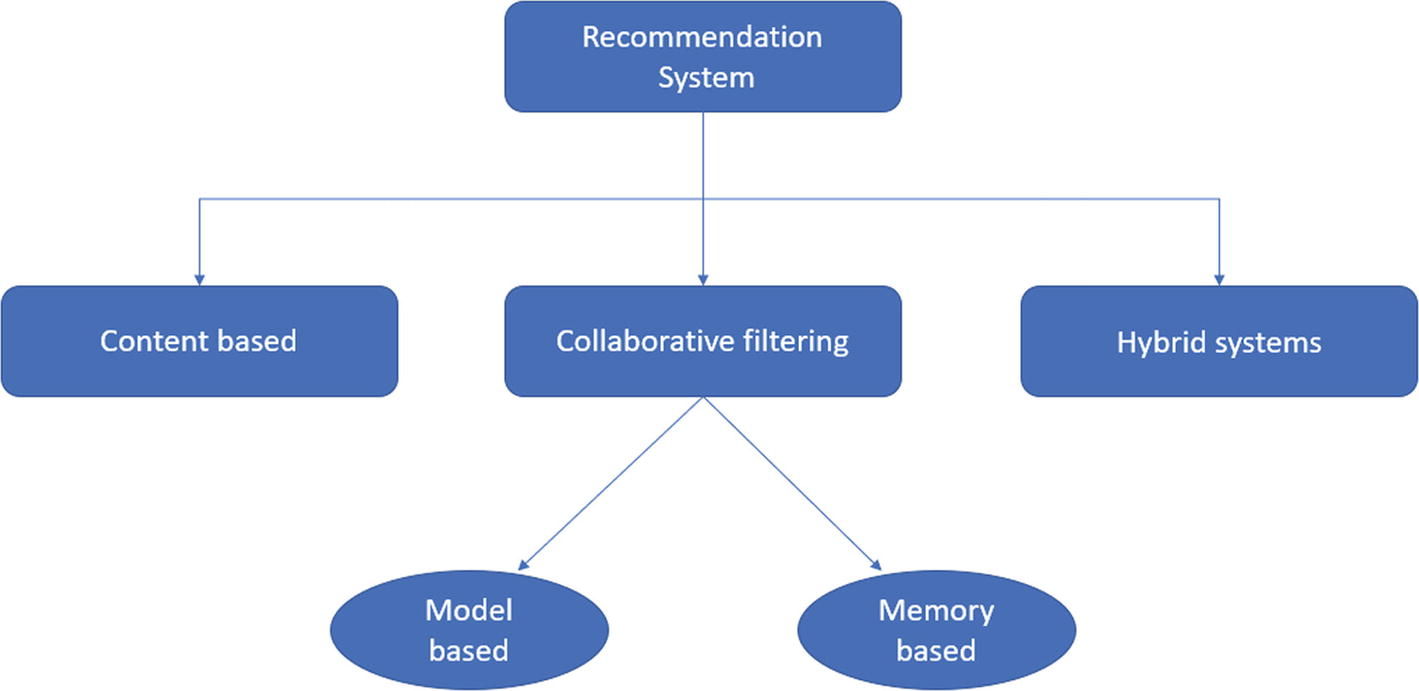

In [1]:
# os.remove("/kaggle/working/googlenewsvectorsnegative300")

We choose the content based model. Our steps through the project are :

1. Data understanding

 
2.	
Preprocessing

 


 
3.	
Model building

 
 
4.	
Recommending product

 

# About the Dataset
2021 has seen a boom in the MOOCs due to the Covid-19 Pandemic. With the availability of numerous paid and free resources on the internet, it becomes overwhelming for students to learn new skills. Therefore, this dataset can be used to create Recommender Systems and recommend courses to students based on the Skills and Difficulty Level entered by the student. The Course Link is also provided, which can be offered by the Recommender System for easy access.


This dataset was scraped off the publicly available information on the Coursera website in September 2021 and manually entered in the case where the data was improperly scraped. It can be used in Recommender Systems to promote Coursera courses based on the Difficulty Level and the Skills needed.

<h1> Recommender Systems Architectures</h1>
We shall explore two common architechtures:

<b>1. TF-IDF-based architecture </b>

<b>2. Word embeddings-based architecture </b>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import  WordNetLemmatizer
# from gensim.models import Word2Vec, KeyedVectors
# from gensim.models.phrases import Phrases, Phraser

import wordcloud
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel


import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin.gz
/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin
/kaggle/input/coursera-courses-dataset-2021/Coursera.csv


In [3]:
df = pd.read_csv('/kaggle/input/coursera-courses-dataset-2021/Coursera.csv')


<h1> Data Exploration and  Data understanding <\h1>

In [4]:
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


In [6]:
df.duplicated().sum()

98

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.drop('Course URL', axis=1, inplace=True)

In [9]:
df.isna().sum()

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course Description    0
Skills                0
dtype: int64

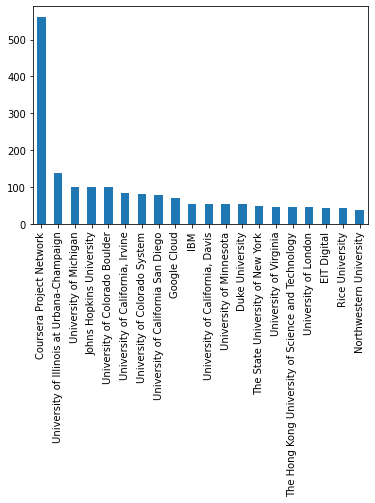

In [10]:
df['University'].value_counts()[0:20].plot(kind='bar')
plt.show()

In [11]:
df['Course Rating'].value_counts()

4.7               707
4.6               602
4.8               585
4.5               380
4.4               235
4.9               174
4.3               159
4.2               120
5                  89
4.1                85
Not Calibrated     82
4                  50
3.8                24
3.9                20
3.6                18
3.7                18
3.5                17
3.4                13
3                  12
3.2                 9
3.3                 6
2.9                 6
2.6                 2
2.8                 2
2.4                 2
1                   2
2                   1
3.1                 1
2.5                 1
1.9                 1
2.3                 1
Name: Course Rating, dtype: int64

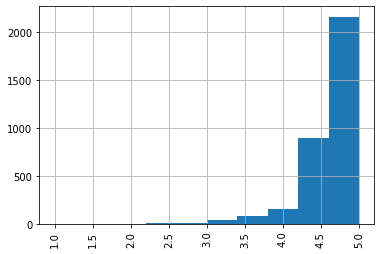

In [12]:
df['cleanCourseRating'] = df['Course Rating']
df[df['cleanCourseRating']=='Not Calibrated']=np.nan
df['cleanCourseRating'].astype('float').hist()
plt.xticks(rotation=90)
plt.show()

In [13]:
df['Skills'][1]

'Finance  business plan  persona (user experience)  business model canvas  Planning  Business  project  Product Development  presentation  Strategy business business-strategy'

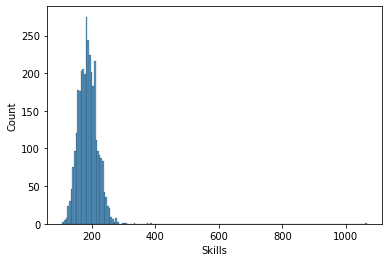

In [14]:
sns.histplot(df['Skills'].str.len())
plt.show()

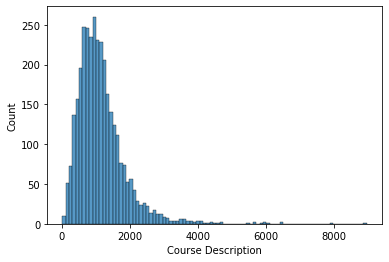

In [15]:
sns.histplot(df['Course Description'].str.len())
plt.show()

In [16]:
df['Course Description'][0:5]

0    Write a Full Length Feature Film Script  In th...
1    By the end of this guided project, you will be...
2    This course consists of a general presentation...
3    When it comes to numbers, there is always more...
4    In this course you�ll learn how to effectively...
Name: Course Description, dtype: object

In [17]:
df['Course Description'] = df['Course Description'].apply(lambda x : "".join(i for i in str(x) if  ord(i)<128))

df['Skills'] = df['Skills'].apply(lambda x : "".join(i for i in str(x) if  ord(i)<128))

df['Course Name'] = df['Course Name'].apply(lambda x : "".join(i for i in str(x) if  ord(i)<128))

df['University'] = df['University'].apply(lambda x : "".join(i for i in str(x) if  ord(i)<128))


<h1>Preprocessing<\h1>

In [18]:
en_stopwords = stopwords.words("english")
stemer = PorterStemmer()
lemma = WordNetLemmatizer()

In [19]:
def clean_stem(text):
    text = str(text)
    re.sub('[^A-Za-z0-9 ]', '', text)
    text = text.lower()
    text_lst = word_tokenize(text)
    text_lst = [stemer.stem(t) for t in text_lst if t not in en_stopwords or len(t) >1]
    return ' '.join(text_lst)

In [21]:
df['text'] = df['Course Name']+' '+df['University']+' '+df['Course Description']+' '+df['Course Rating']+' '+df['Difficulty Level']+' '+df['Skills']

In [22]:
df.drop(['University', 'Difficulty Level', 'Course Rating','Course Description', 'Skills'], axis=1, inplace=True)

In [23]:
df.columns

Index(['Course Name', 'cleanCourseRating', 'text'], dtype='object')

In [24]:
df.iloc[0]

Course Name          Write A Feature Length Screenplay For Film Or ...
cleanCourseRating                                                  4.8
text                 Write A Feature Length Screenplay For Film Or ...
Name: 0, dtype: object

In [25]:
print(df['text'].iloc[0])

Write A Feature Length Screenplay For Film Or Television Michigan State University Write a Full Length Feature Film Script  In this course, you will write a complete, feature-length screenplay for film or television, be it a serious drama or romantic comedy or anything in between. Youll learn to break down the creative process into components, and youll discover a structured process that allows you to produce a polished and pitch-ready script by the end of the course. Completing this project will increase your confidence in your ideas and abilities, and youll feel prepared to pitch your first script and get started on your next. This is a course designed to tap into your creativity and is based in "Active Learning". Most of the actual learning takes place within your own activities - that is, writing! You will learn by doing.  Here is a link to a TRAILER for the course. To view the trailer, please copy and paste the link into your browser. https://vimeo.com/382067900/b78b800dc0  Learne

In [26]:
df['text'][0]

'Write A Feature Length Screenplay For Film Or Television Michigan State University Write a Full Length Feature Film Script  In this course, you will write a complete, feature-length screenplay for film or television, be it a serious drama or romantic comedy or anything in between. Youll learn to break down the creative process into components, and youll discover a structured process that allows you to produce a polished and pitch-ready script by the end of the course. Completing this project will increase your confidence in your ideas and abilities, and youll feel prepared to pitch your first script and get started on your next. This is a course designed to tap into your creativity and is based in "Active Learning". Most of the actual learning takes place within your own activities - that is, writing! You will learn by doing.  Here is a link to a TRAILER for the course. To view the trailer, please copy and paste the link into your browser. https://vimeo.com/382067900/b78b800dc0  Learn

In [27]:
df['text_stem']=df['text'].apply(clean_stem)
# df['text_stem'] = df['text_stem'].apply(lambda x: " ".join(x for x in x.split() if len(x)>1))

In [28]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(df.text_stem))


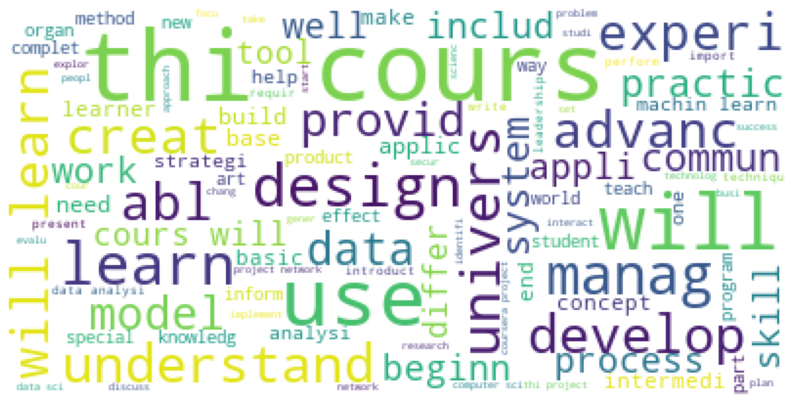

In [29]:
plt.figure(figsize=(14,14))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<h1> Model Building </h1>

<h2> TF-IDF-based Model</h2>

In [32]:
vectorizer = TfidfVectorizer()

In [33]:
tfidf_matrix = vectorizer.fit_transform(df.text_stem)

In [34]:
tfidf_matrix.shape

(3424, 15173)

In [35]:
course_name = df['Course Name']
indices = pd.Series(df.index, index = df['Course Name'])

In [36]:
def recommendation2(cname):
    index = indices[cname]
    # Obtaining the pairwsie similarity scores
    score_matrix = linear_kernel(tfidf_matrix[index], tfidf_matrix)
    matching_sc= list(enumerate(score_matrix[0]))
    # Sort the product based on the similarity scores
    matching_sc= sorted(matching_sc, key=lambda x: x[1], reverse=True)
    # Getting the scores of the 10 most similar product
    matching_sc= matching_sc[1:10]
    # Getting the product indices
    course_indices = [i[0] for i in matching_sc]
    # Show the similar products
    return df['Course Name'].iloc[course_indices]

In [38]:
df['Course Name'].iloc[1]

'Business Strategy: Business Model Canvas Analysis with Miro'

In [39]:
find_rec = 'Business Strategy: Business Model Canvas Analysis with Miro'
print(f'Similar to\n {find_rec}: \n')
for i in recommendation2(find_rec)[0:5]:
    print(i)

Similar to
 Business Strategy: Business Model Canvas Analysis with Miro: 

Product  and Service Development: Empathy  Mapping with Miro
Product Development: Customer Persona Development with Miro
Product Development: Customer Journey Mapping with Miro
Agile Projects: Develop Product Wireframe Prototypes in Miro
Analyzing Product Opportunities with Creately


<h2> KNN-based Model</h2>


In [41]:
from sklearn.neighbors import NearestNeighbors

In [42]:
knn_matrix = tfidf_matrix.toarray()

In [43]:
nn = NearestNeighbors()
nn.fit(knn_matrix)

NearestNeighbors()

In [44]:
def inference(text):
    text = clean_stem(text)
    knn_matrix = vectorizer.transform([text])
    return nn.kneighbors(n_neighbors=10, X = knn_matrix, return_distance=False)

In [45]:
arr = inference(find_rec).tolist()[0]

In [46]:
for i in df.iloc[arr]['Course Name']:
    print(i)
  

Business Strategy: Business Model Canvas Analysis with Miro
Innovating with the Business Model Canvas
Change Leadership: Strategic Route Analysis with Miro
Social Business Model and Planning for Social Innovation
Capstone Course: Start Up Your Fintech Future
Business Model Canvas: A Tool for Entrepreneurs and Innovators (Project-Centered Course)
Building the Business Model for Corporate Entrepreneurs
Product  and Service Development: Empathy  Mapping with Miro
Product Development: Customer Persona Development with Miro
Customer-Centric IT Strategy


<h2> Word embeddings-based Model Using Word2vec</h2>

Word embeddings are N-dimensional vectors for each word that captures the meaning of the word along with context.

word2vec is one of the methods to construct such an embedding. It uses a shallow neural network to build the embeddings.  We shall try Average word2vec and TF-IDF word2vec.

__Make sure to install gensim 3.8.3 for this workbook to work__

In [50]:
# !pip uninstall gensim 
# !pip install gensim==3.8.3




In [51]:
# __requires__= 'gensim==3.8.3'
# import pkg_resources
# pkg_resources.require("gensim==3.8.3")
import gensim
gensim.__version__

'3.8.3'

In [52]:
from gensim.models import Word2Vec, KeyedVectors



<h3>Average Word2Vec</h3>

In [53]:
corpus = []
for words in df['text_stem']:
    corpus.append(words.split())

In [55]:
EMBEDDING_FILE = '/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin'
google_word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary = True)

# Training our corpus with the model
google_model = Word2Vec(size = 300, window = 5, min_count = 2, workers = -1)
google_model.build_vocab(corpus)

google_model.intersect_word2vec_format(EMBEDDING_FILE, lockf = 1.0, binary = True)
google_model.train(corpus, total_examples = google_model.corpus_count, epochs = 5)

(0, 0)

In [56]:
def vectors(x):
    
    
    global word_embeddings
    word_embeddings = []

    
    for line in df['text_stem']:
        avgword2vec = None
        count = 0
        for word in line.split():
            if word in google_model.wv.vocab:
                count += 1
                if avgword2vec is None:
                    avgword2vec = google_model[word]
                else:
                    avgword2vec = avgword2vec + google_model[word]
                
        if avgword2vec is not None:
            avgword2vec = avgword2vec / count
            word_embeddings.append(avgword2vec)

In [57]:
def recommendations(course):
    
    # Calling the function vectors
    vectors(df)
    
    # Finding cosine similarity for the vectors
    cosine_similarities = cosine_similarity(word_embeddings, word_embeddings)

   
    courses = df[['Course Name', 'text_stem']]

    # Reverse mapping of the index
    indices = pd.Series(df.index, index = df['Course Name']).drop_duplicates()
         
    idx = indices[course]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]
    course_indices = [i[0] for i in sim_scores]
    recommend = courses.iloc[course_indices]

    return recommend

In [58]:
print(f'Similar to "{find_rec}":')
for i in recommendations(find_rec)['Course Name']:
    print(i)

Similar to "Business Strategy: Business Model Canvas Analysis with Miro":
Product  and Service Development: Empathy  Mapping with Miro
Agile Projects: Develop Product Wireframe Prototypes in Miro
Agile Projects: Defining Epics and Mapping Value with Taiga
Analyzing Macro-Environmental Factors Using Creately
Agile Projects:  Developing Tasks with Taiga


<h2> TF-IDF Word2Vec Model</h2>

In [59]:
tfidf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 3), min_df = 5, stop_words = 'english')
tfidf.fit(df['text_stem'])

# Getting the words from the TF-IDF model
tfidf_list = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))

# TF-IDF words/column names
tfidf_feature = tfidf.get_feature_names()

In [60]:
tfidf_vectors = [] 
line = 0


for desc in corpus:

    # Word vectors are of zero length (using 300 dimensions)
    sent_vec = np.zeros(300) 

    # Number of words with a valid vector in the 'text_stem'
    weight_sum =0; 

    # For each word in the 'text_stem'
    for word in desc: 
        if word in google_model.wv.vocab and word in tfidf_feature:
            vec = google_model.wv[word]
            tf_idf = tfidf_list[word] * (desc.count(word) / len(desc))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_vectors.append(sent_vec)
    line += 1

In [61]:
def recommendations_2(course):
    
    # Finding cosine similarity for the vectors
    cosine_similarities = cosine_similarity(tfidf_vectors,  tfidf_vectors)
    
    
    courses = df[['Course Name', 'text_stem']]
    
    # Reverse mapping of the index
    indices = pd.Series(df.index, index = df['Course Name']).drop_duplicates()
        
    idx = indices[course]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]
    course_indices = [i[0] for i in sim_scores]
    recommend = courses.iloc[course_indices]
    return recommend

In [62]:
print(f'Similar to "{find_rec}":\n')
for i in recommendations_2(find_rec)['Course Name']:
    print(i)

Similar to "Business Strategy: Business Model Canvas Analysis with Miro":

Innovating with the Business Model Canvas
New Models of Business in Society
Strategy Formulation
Enterprise Architecture
Managerial Economics and Business Analysis Capstone
